In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
import sys
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
#read the data
df = pd.read_csv('/home/ims24/Fraud-Detection/AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
# Perceptron implementation for fraud detection
percent_fraud = df.isFraud.value_counts()[1] / len(df) * 100
print(f"Percentage of fraudulent transactions: {percent_fraud:.2f}%")

Percentage of fraudulent transactions: 0.13%


In [12]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

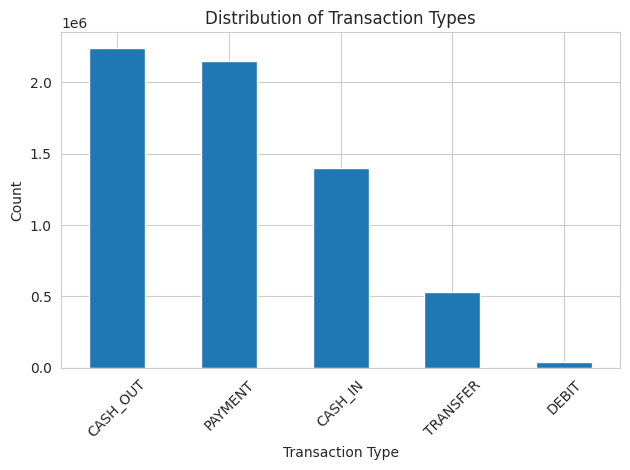

In [13]:
#plot transaction types distribution
df.type.value_counts().plot(kind='bar')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  


In [14]:
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

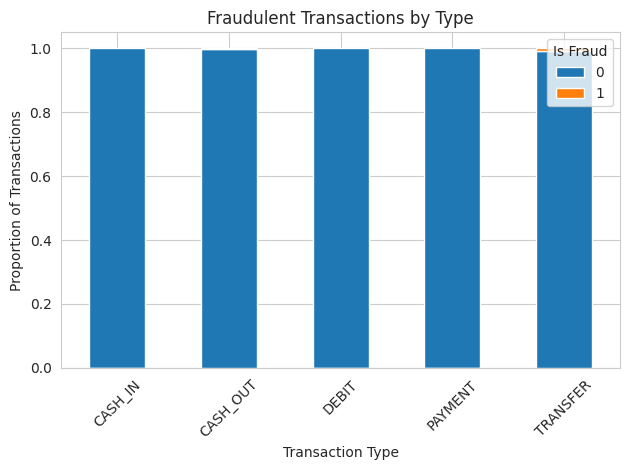

In [15]:
df.groupby('type')['isFraud'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Proportion of Transactions')
plt.legend(title='Is Fraud', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

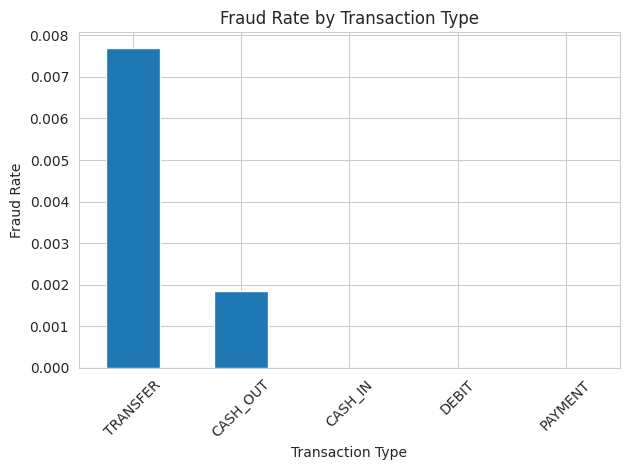

In [16]:
#plo fraud rate by transaction type
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_rate_by_type.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

In [17]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

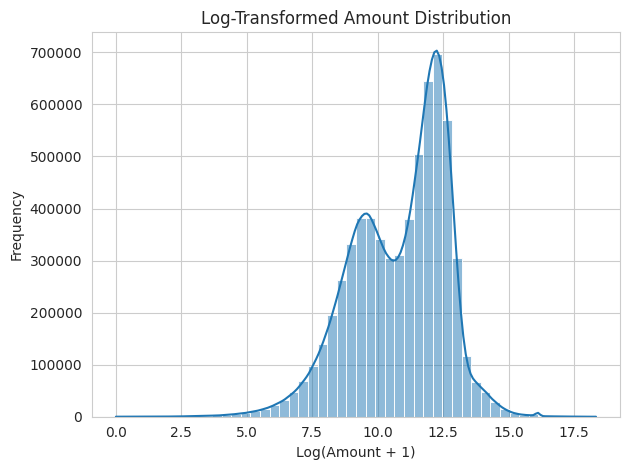

In [18]:
#plot the amount distribution using logarithmic scale to handle skewness
sns.histplot(np.log1p(df['amount']), bins=50, kde=True)
plt.title('Log-Transformed Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  

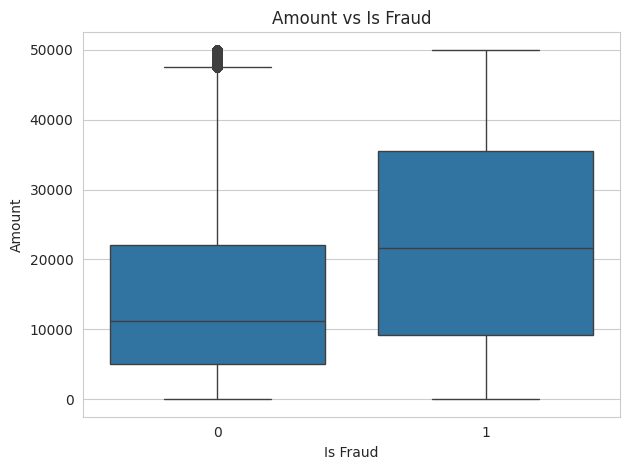

In [19]:
# plot amount vs is fraud using boxplot with amount filtered less than 50k
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < 50000])
plt.title('Amount vs Is Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()  

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df['BalanceOriginal'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['BalanceDestination'] = df['newbalanceDest'] - df['oldbalanceDest']

In [22]:
(df.BalanceOriginal < 0).sum(), (df.BalanceDestination < 0).sum()

(1399253, 1238864)

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceOriginal,BalanceDestination
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


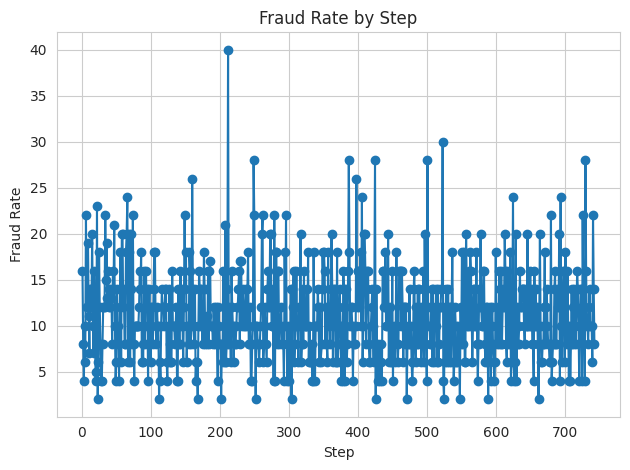

In [24]:
#plot fraud per step
fraud_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, marker='o')
plt.title('Fraud Rate by Step')
plt.xlabel('Step')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

In [25]:
# drop stepcolumn as it is not useful for modeling
df.drop('step', axis=1, inplace=True)

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,BalanceOriginal,BalanceDestination
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [27]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders



nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [28]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [42]:
fraud_type = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_type['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0, 0.5, 'Count')

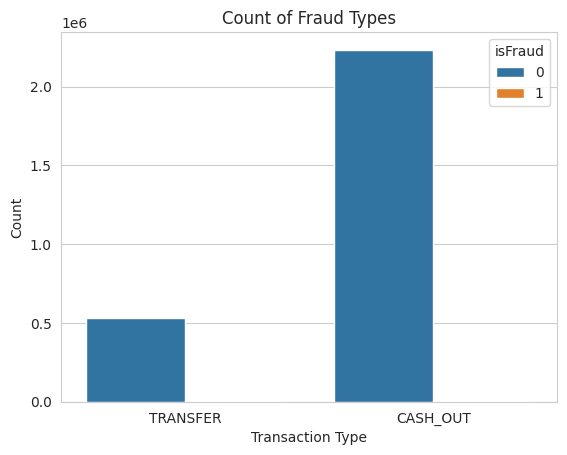

In [30]:
#Plot a count plot of fraud types
sns.countplot(x='type', data=fraud_type,hue='isFraud')
plt.title('Count of Fraud Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

In [32]:
Fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
Fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [43]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'BalanceOriginal', 'BalanceDestination'],
      dtype='object')

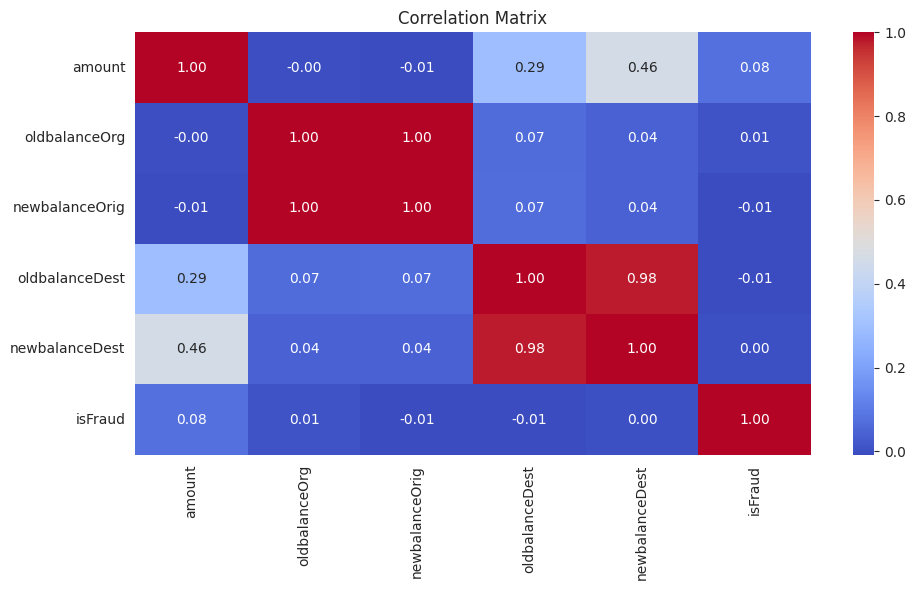

In [46]:
#Correlation for Numeric Columns
corr = df[['amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']].corr()
plt.figure(figsize=(10, 6)) 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix') 
plt.tight_layout() 
plt.show() 

In [48]:
zero_after_transfer = df[
    (df['oldbalanceOrg']  > 0) & 
    (df['newbalanceOrig'] == 0) & 
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]
zero_after_transfer.shape

(1188074, 12)

In [49]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### We have Class Imbalance that needs to be handled

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [51]:
df_fraud = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df_fraud.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,BalanceOriginal,BalanceDestination
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [52]:
cat_columns = ['type']
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']  
target = 'isFraud'  

In [53]:
y = df_fraud[target]
x = df_fraud.drop(target, axis=1)

In [54]:
x.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'BalanceOriginal', 'BalanceDestination'],
      dtype='object')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


In [56]:
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns), 
                  ('cat', OneHotEncoder(drop='first'), cat_columns),
                  ],
                  remainder='drop'
    )

In [57]:
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression( class_weight='balanced', max_iter=1000))
])

In [58]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
y_pred = pipeline.predict(X_test)


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [ ]:
#Print confusion Matrix
confusion_matrix(y_test,y_pred)

array([[1804823,  101499],
       [    151,    2313]])

In [63]:
pipeline.score(X_test,y_test)

0.9467462565211606

In [64]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']